## This model has been made using one of SciKit Learn's datasets on breast cancer. Based on 10 attributes- <br>
<ul> 
<li> radius (mean of distances from center to points on the perimeter) </li>
<li>texture (standard deviation of gray-scale values) </li>
<li>perimeter</li>
<li> area </li>
<li> smoothness (local variation in radius lengths)</li>
<li> compactness (perimeter^2 / area - 1.0)</li>
<li> concavity (severity of concave portions of the contour)</li>
<li> concave points (number of concave portions of the contour)</li><li> symmetry</li>
<li> fractal dimension ("coastline approximation" - 1)</li> </ul>
These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. <br>
More details about the dataset can be found <a href= "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here.</a>
<hr>
The output of the model comes as "Malignant (very infectious)" or "Benign (not that harmful)"

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz
%matplotlib inline

In [ ]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.target_names)

['malignant' 'benign']


In [ ]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
type(cancer.data)
cancer.data.shape

(569, 30)

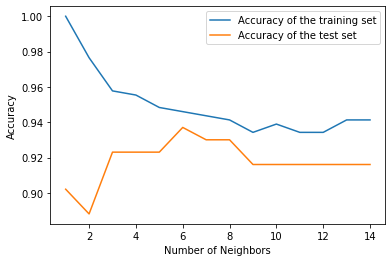

In [ ]:
#KNN Classifier 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []


neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [ ]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.937063


In [ ]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))


Accuracy on the training set: 0.955
Accuracy on the training set: 0.951


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


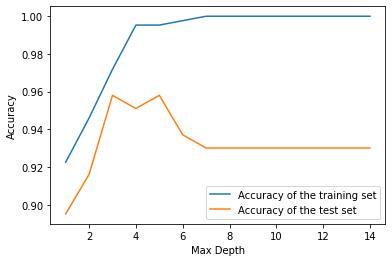

In [ ]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [ ]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


numpy.ndarray

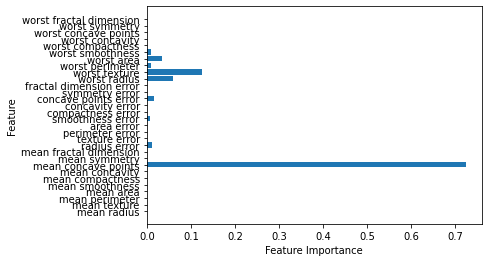

In [ ]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#Random Forests
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('Accuracy for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy for test data: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy for training data: 1.000
Accuracy for test data: 0.972


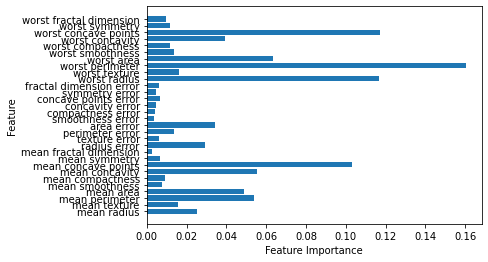

In [ ]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#Neural Network
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy for training data: 0.939
Accuracy for test data: 0.916


In [ ]:
print('The max per each feature:\n{}'.format(cancer.data.max(axis=0)))

The max per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Accuracy for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy for training data: 1.000
Accuracy for test data: 0.958


In [ ]:
mlp

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('Accuracy for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy for training data: 0.986
Accuracy for test data: 0.972


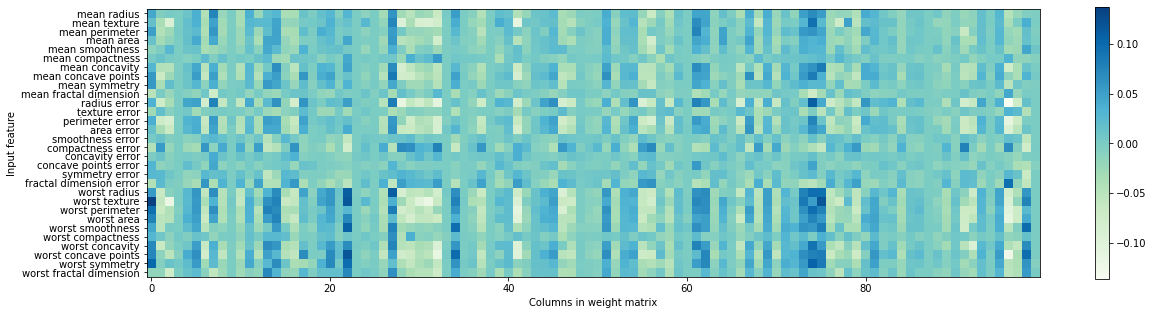

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [ ]:
# SVM (Support Vector Machine)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm= SVC()
svm.fit(X_train, y_train)

print('Accuracy on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('Accuracy on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

Accuracy on train dataset: 0.904
Accuracy on test dataset: 0.937


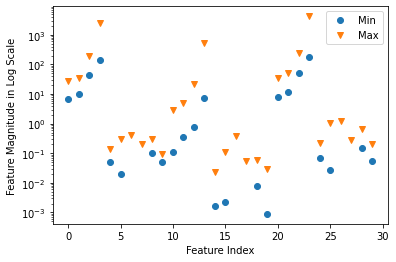

In [ ]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [ ]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max per feature\n{}'.format(X_train_scaled.max(axis=0)))

Min per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('Accuracy on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('Accuracy on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

Accuracy on train dataset: 1.000
Accuracy on test dataset: 0.958
